In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image.

histSize = BINS

DIMS - It is the number of parameters for which we collect the data. If we are collecting only intensity value, it is 1.

RANGE- Range of intensity values you want to measure. 

##### Histogram Calculation in OpenCV

We use **cv2.calcHist()**

    cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256]

In [7]:
img = cv2.imread('images/scenic.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

###### Histogram Calculation in Numpy

Numpy also provides you a function, np.histogram(). So instead of calcHist() function, you can try below line :

In [3]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

hist is same as we calculated before. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don’t need that 256. Upto 255 is sufficient.

> Numpy has another function, np.bincount() which is much faster than (around 10X) np.histogram(). So for one-dimensional histograms, use that. Don’t forget to set minlength = 256 in np.bincount. For example, hist = np.bincount(img.ravel(),minlength=256)

> OpenCV function is more faster than (around 40X) than np.histogram(). So stick with OpenCV function.

##### Plotting Histograms

###### 1. Using Matplotlib

**pyplot.hist()**

No need to use calcHist() or np.histogram()

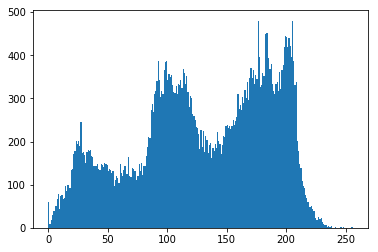

In [4]:
img = cv2.imread('images/scenic.jpg', 0)
plt.hist(img.ravel(), 256, [0, 256]);

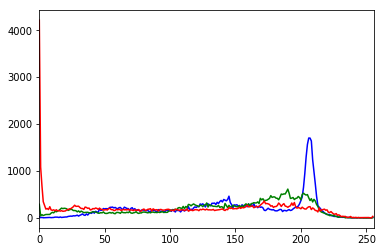

In [13]:
color = ('b', 'g', 'r')
img = cv2.imread('images/scenic.jpg') #reading color image
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

##### Application of Mask

We use Mask to find histograms of some regioins of an image. Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

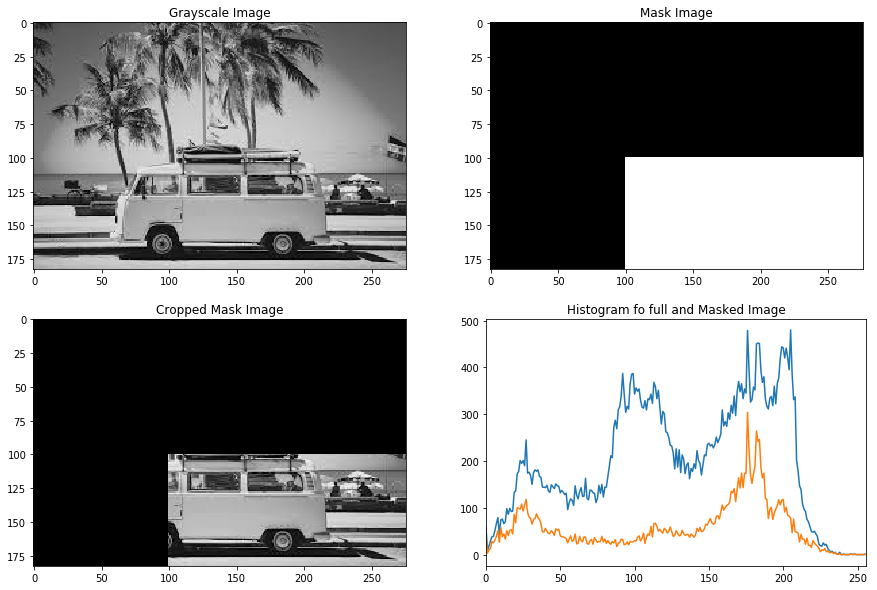

In [3]:
img = cv2.imread('images/scenic.jpg', 0)

mask = np.zeros(img.shape[:2], np.uint8)
mask[100:200, 100:400] = 255
masked_img = cv2.bitwise_and(img, img, mask = mask)

hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])

plt.figure(figsize = (15, 10))
plt.subplot(221)
plt.imshow(img, 'gray')
plt.title('Grayscale Image')
plt.subplot(222)
plt.imshow(mask, 'gray')
plt.title('Mask Image')
plt.subplot(223)
plt.imshow(masked_img, 'gray')
plt.title('Cropped Mask Image')
plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0,256])
plt.title('Histogram fo full and Masked Image');


### Histogram Equalization

Consider an image whose values are confined to some specific range of values only. for ex, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the miamge. So you need to stretch this histogram to either ends. This is Histogram Equalization.

https://en.wikipedia.org/wiki/Histogram_equalization

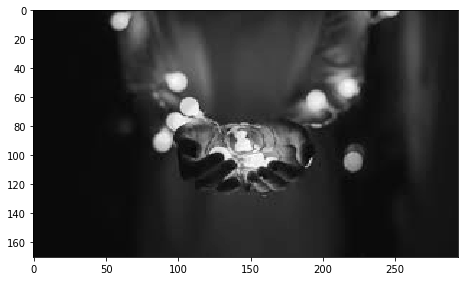

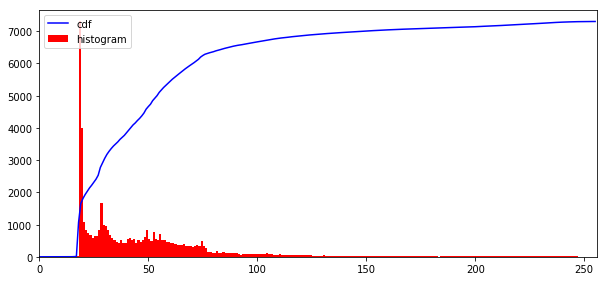

In [29]:
img = cv2.imread('images/dark.jpg', 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

plt.figure(figsize = (10, 10))
plt.subplot(212)
plt.imshow(img, 'gray');

plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left');


You can see histogram lies in darker region. We need the full spectrum. For that, we need a transformation function which maps the input pixels from darker region to output pixels in full region. That is what histogram equalization does.

Masked Numpy Array: https://docs.scipy.org/doc/numpy/reference/maskedarray.html

> For masked array all operations are performed on non-masked elements.

In [30]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

From the above code we get a look-up table that gives us the information on that is the output pixel value  for every pixel value. We can just apply the transform.

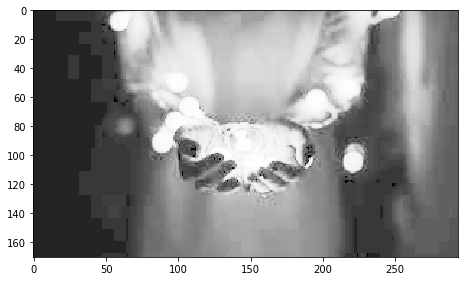

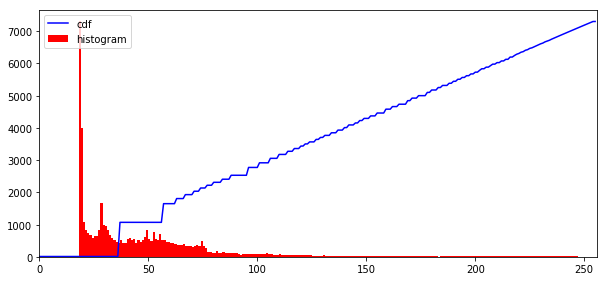

In [31]:
img2 = cdf[img]

hist, bins = np.histogram(img2.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

plt.figure(figsize = (10, 10))
plt.subplot(212)
plt.imshow(img2, 'gray');

plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left');

In [32]:
hist

array([  64,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 7298,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3989,    0,    0,    0,    0,    0, 1090,    0,    0,
          0,  841,    0,    0,    0,  727,    0,    0,  689,    0,    0,
        586,    0,    0,  632,    0,    0,    0,  660,    0,    0,    0,
        842,    0,    0,    0,    0,    0,    0,    0, 1672,    0,    0,
          0,    0,  989,    0,    0,    0,    0,  956,    0,    0,    0,
        835,    0,    0,    0,  670,    0,    0,  591,    0,    0,  530,
          0,  453,    0,  432,    0,    0,  536,    0,  421,    0,  436,
          0,    0,  557,    0,    0,  572,    0,    0,  536,    0,  566,
          0,    0,  425,    0,  516,    0,  456,   

Another important feature is that, even if the image was a brighter image (instead of a darker one we used), after equalization we will get almost the same image as we got. As a result, this is used as a “reference tool” to make all images with same lighting conditions. This is useful in many cases. For example, in face recognition, before training the face data, the images of faces are histogram equalized to make them all with same lighting conditions.

##### Histogram Equalization in OpenCV

**cv2.equalizeHist()** - Its input is a grayscale image and output is a histogram equalized image


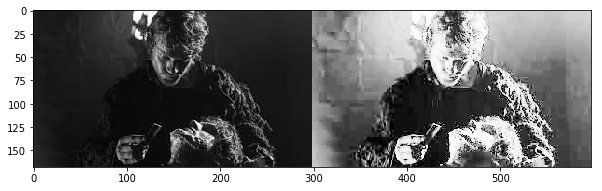

In [27]:
img = cv2.imread(r'images/reek.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.figure(figsize = (10, 15))
plt.imshow(res, 'gray');


Histogram equalization is good when histogram of the image is confined to a particular region. It won’t work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present.

##### CLAHE (Contrast Limites Adaptive Histogram Equalization)

The histogram equlization above cosiders the global contrast of the image. In many cases, it is not a good idea. Check below example

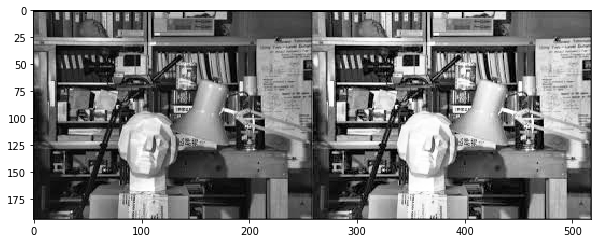

In [38]:
img = cv2.imread(r'images/clah.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.figure(figsize = (10, 15))
plt.imshow(res, 'gray');


It is true that the background contrast has improved after histogram equalization. But compare the face of statue in both images. We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases 

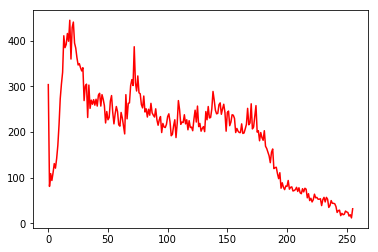

In [39]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color ='r')


To solve this problem, adaptive histogram equalization is used. In this, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

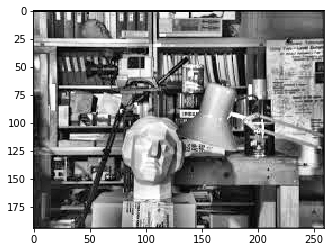

In [40]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.imshow(cl1, 'gray')

### 2D Histograms

The above are only one dimensional histograms. It is called one-dimensional because we are taking only one feature into our consideration, ie grayscale intensity value of the pixel. But in two-dimensional histograms, you consider two features. Normally it is used for finding color histograms where two features are Hue & Saturation values of every pixel.

##### 2D Histograms in OpenCV
For color histograms, we need to convert the image from BGR to HSV. (for 1D histogram, we converted from BGR to Grayscale). For 2D histograms, its parameters will be modified as follows:

- channels = [0,1] because we need to process both H and S plane.
- bins = [180,256] 180 for H plane and 256 for S plane.
- range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

In [ ]:
img = cv2.imread('images/tiger.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

##### Plotting 2D Histograms

###### Method - 1 : Using Matplotlib

We can use matplotlib.pyplot.imshow() function to plot 2D histogram with different color maps. It gives us a much better idea about the different pixel density. But this also, doesn’t gives us idea what color is there on a first look, unless you know the Hue values of different colors. It is simple and better.

> While using this function interpolation flag should be nearest for better results.

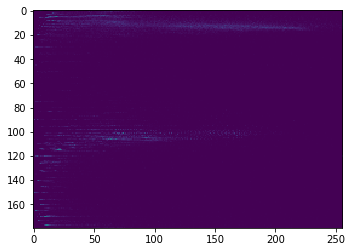

In [8]:
plt.imshow(hist,interpolation = 'nearest')
plt.imshow(hist);

###### Method - 2 : Using cv2.imshow()

The result we get is a two dimensional array of size 180x256. So we can show them as we do normally, using cv2.imshow() function. It will be a grayscale image and it won’t give much idea what colors are there, unless you know the Hue values of different colors.


In [28]:
cv2.imshow('Histograms', hist)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 2D Histograms in Numpy

**np.histogram2d()** - (for 1d np.histogram())

First argument is H plane, second one is the S plane, third is number of bins for each and fourth is their range.

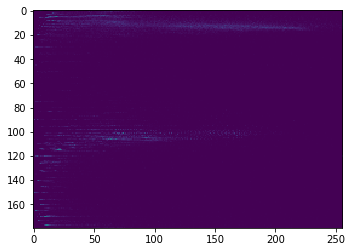

In [39]:
hist, xbins, ybins = np.histogram2d(hsv[:, :, 0].ravel(),hsv[:, :, 1].ravel(),[180,256],[[0,180],[0,256]])
plt.imshow(hist)

(194, 259)